In [ ]:
## import necessary libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
pd.set_option('display.max_columns', 500)
warnings.filterwarnings('ignore')


In [ ]:
## upload books dataset

books_df = pd.read_csv('books.csv')
books_df.head()

id  book_id  best_book_id  work_id  books_count       isbn        isbn13  \
0   1  2767052       2767052  2792775          272  439023483  9.780439e+12   
1   2        3             3  4640799          491  439554934  9.780440e+12   
2   3    41865         41865  3212258          226  316015849  9.780316e+12   
3   4     2657          2657  3275794          487   61120081  9.780061e+12   
4   5     4671          4671   245494         1356  743273567  9.780743e+12   

                       authors  original_publication_year  \
0              Suzanne Collins                     2008.0   
1  J.K. Rowling, Mary GrandPré                     1997.0   
2              Stephenie Meyer                     2005.0   
3                   Harper Lee                     1960.0   
4          F. Scott Fitzgerald                     1925.0   

                             original_title  \
0                          The Hunger Games   
1  Harry Potter and the Philosopher's Stone   
2                                  Twilight   
3                     To Kill a Mockingbird   
4                          The Great Gatsby   

                                               title language_code  \
0            The Hunger Games (The Hunger Games, #1)           eng   
1  Harry Potter and the Sorcerer's Stone (Harry P...           eng   
2                            Twilight (Twilight, #1)         en-US   
3                              To Kill a Mockingbird           eng   
4                                   The Great Gatsby           eng   

   average_rating  ratings_count  work_ratings_count  work_text_reviews_count  \
0            4.34        4780653             4942365                   155254   
1            4.44        4602479             4800065                    75867   
2            3.57        3866839             3916824                    95009   
3            4.25        3198671             3340896                    72586   
4            3.89        2683664             2773745                    51992   

   ratings_1  ratings_2  ratings_3  ratings_4  ratings_5  \
0      66715     127936     560092    1481305    2706317   
1      75504     101676     455024    1156318    3011543   
2     456191     436802     793319     875073    1355439   
3      60427     117415     446835    1001952    1714267   
4      86236     197621     606158     936012     947718   

                                           image_url  \
0  https://images.gr-assets.com/books/1447303603m...   
1  https://images.gr-assets.com/books/1474154022m...   
2  https://images.gr-assets.com/books/1361039443m...   
3  https://images.gr-assets.com/books/1361975680m...   
4  https://images.gr-assets.com/books/1490528560m...   

                                     small_image_url  
0  https://images.gr-assets.com/books/1447303603s...  
1  https://images.gr-assets.com/books/1474154022s...  
2  https://images.gr-assets.com/books/1361039443s...  
3  https://images.gr-assets.com/books/1361975680s...  
4  https://images.gr-assets.com/books/1490528560s...

In [ ]:
## extract columns related to recoomendations

books = books_df[['id', 'authors', 'title', 'ratings_count']]
books.rename(columns={"id":"book_id"}, inplace=True)
books.head()

book_id                      authors  \
0        1              Suzanne Collins   
1        2  J.K. Rowling, Mary GrandPré   
2        3              Stephenie Meyer   
3        4                   Harper Lee   
4        5          F. Scott Fitzgerald   

                                               title  ratings_count  
0            The Hunger Games (The Hunger Games, #1)        4780653  
1  Harry Potter and the Sorcerer's Stone (Harry P...        4602479  
2                            Twilight (Twilight, #1)        3866839  
3                              To Kill a Mockingbird        3198671  
4                                   The Great Gatsby        2683664

In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   book_id        10000 non-null  int64 
 1   authors        10000 non-null  object
 2   title          10000 non-null  object
 3   ratings_count  10000 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 312.6+ KB


In [ ]:
## import rating dataset

rating = pd.read_csv('ratings.csv')
rating.head()

book_id  user_id  rating
0        1      314       5
1        1      439       3
2        1      588       5
3        1     1169       4
4        1     1185       4

In [ ]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981756 entries, 0 to 981755
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   book_id  981756 non-null  int64
 1   user_id  981756 non-null  int64
 2   rating   981756 non-null  int64
dtypes: int64(3)
memory usage: 22.5 MB


In [ ]:
## merge both book and rating datasets

df = rating.merge(books, on='book_id', how='left')
df.head()

book_id  user_id  rating          authors  \
0        1      314       5  Suzanne Collins   
1        1      439       3  Suzanne Collins   
2        1      588       5  Suzanne Collins   
3        1     1169       4  Suzanne Collins   
4        1     1185       4  Suzanne Collins   

                                     title  ratings_count  
0  The Hunger Games (The Hunger Games, #1)        4780653  
1  The Hunger Games (The Hunger Games, #1)        4780653  
2  The Hunger Games (The Hunger Games, #1)        4780653  
3  The Hunger Games (The Hunger Games, #1)        4780653  
4  The Hunger Games (The Hunger Games, #1)        4780653

## exploration of df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981756 entries, 0 to 981755
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   book_id        981756 non-null  int64 
 1   user_id        981756 non-null  int64 
 2   rating         981756 non-null  int64 
 3   authors        981756 non-null  object
 4   title          981756 non-null  object
 5   ratings_count  981756 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 52.4+ MB


In [ ]:
df.isnull().sum()

book_id          0
user_id          0
rating           0
authors          0
title            0
ratings_count    0
dtype: int64

In [ ]:
df.nunique()

book_id          10000
user_id          53424
rating               5
authors           4664
title             9964
ratings_count     9003
dtype: int64

In [ ]:
df['rating'].value_counts()

4    357366
5    292961
3    248623
2     63231
1     19575
Name: rating, dtype: int64

Text(0.5, 1.0, 'Rating Histogram')

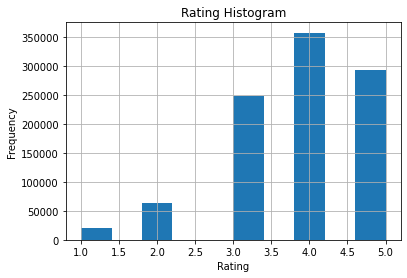

In [ ]:
df['rating'].hist()
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Histogram')

In [ ]:
df['ratings_count'].agg(['min', 'max'])

min       2716
max    4780653
Name: ratings_count, dtype: int64

In [ ]:
## highest rated book (rating_counts wise)

df[df['ratings_count'] == df['ratings_count'].max()]

book_id  user_id  rating          authors  \
0         1      314       5  Suzanne Collins   
1         1      439       3  Suzanne Collins   
2         1      588       5  Suzanne Collins   
3         1     1169       4  Suzanne Collins   
4         1     1185       4  Suzanne Collins   
..      ...      ...     ...              ...   
95        1    51460       3  Suzanne Collins   
96        1    51480       1  Suzanne Collins   
97        1    51838       5  Suzanne Collins   
98        1    52036       2  Suzanne Collins   
99        1    53245       4  Suzanne Collins   

                                      title  ratings_count  
0   The Hunger Games (The Hunger Games, #1)        4780653  
1   The Hunger Games (The Hunger Games, #1)        4780653  
2   The Hunger Games (The Hunger Games, #1)        4780653  
3   The Hunger Games (The Hunger Games, #1)        4780653  
4   The Hunger Games (The Hunger Games, #1)        4780653  
..                                      ...            ...  
95  The Hunger Games (The Hunger Games, #1)        4780653  
96  The Hunger Games (The Hunger Games, #1)        4780653  
97  The Hunger Games (The Hunger Games, #1)        4780653  
98  The Hunger Games (The Hunger Games, #1)        4780653  
99  The Hunger Games (The Hunger Games, #1)        4780653  

[100 rows x 6 columns]

# **user based recommendation**

In [ ]:
df.head(2)

book_id  user_id  rating          authors  \
0        1      314       5  Suzanne Collins   
1        1      439       3  Suzanne Collins   

                                     title  ratings_count  
0  The Hunger Games (The Hunger Games, #1)        4780653  
1  The Hunger Games (The Hunger Games, #1)        4780653

In [ ]:
## pivot table: index=user_id, columns=title, values=rating

users_books_df = df.pivot_table(index='user_id', columns='title', values='rating')

In [ ]:
users_books_df

title     Angels (Walsh Family, #3)  \
user_id                               
1                               NaN   
2                               NaN   
3                               NaN   
4                               NaN   
5                               NaN   
...                             ...   
53420                           NaN   
53421                           NaN   
53422                           NaN   
53423                           NaN   
53424                           NaN   

title    "حكايات فرغلي المستكاوي "حكايتى مع كفر السحلاوية  #GIRLBOSS  \
user_id                                                                
1                                                     NaN        NaN   
2                                                     NaN        NaN   
3                                                     NaN        NaN   
4                                                     NaN        NaN   
5                                                     NaN        NaN   
...                                                   ...        ...   
53420                                                 NaN        NaN   
53421                                                 NaN        NaN   
53422                                                 NaN        NaN   
53423                                                 NaN        NaN   
53424                                                 NaN        NaN   

title    'Salem's Lot  'Tis (Frank McCourt, #2)  \
user_id                                           
1                 NaN                       NaN   
2                 NaN                       NaN   
3                 NaN                       NaN   
4                 NaN                       NaN   
5                 NaN                       NaN   
...               ...                       ...   
53420             NaN                       NaN   
53421             NaN                       NaN   
53422             NaN                       NaN   
53423             NaN                       NaN   
53424             NaN                       NaN   

title    1,000 Places to See Before You Die  1/4 جرام  \
user_id                                                 
1                                       NaN       NaN   
2                                       NaN       NaN   
3                                       NaN       NaN   
4                                       NaN       NaN   
5                                       NaN       NaN   
...                                     ...       ...   
53420                                   NaN       NaN   
53421                                   NaN       NaN   
53422                                   NaN       NaN   
53423                                   NaN       NaN   
53424                                   NaN       NaN   

title    10% Happier: How I Tamed the Voice in My Head, Reduced Stress Without Losing My Edge, and Found Self-Help That Actually Works  \
user_id                                                                                                                                  
1                                                      NaN                                                                               
2                                                      NaN                                                                               
3                                                      NaN                                                                               
4                                                      NaN                                                                               
5                                                      NaN                                                                               
...                                                    ...                                                                               
53420                                        

## Select random user for recommendation and check the which book he/she read

In [ ]:
## select a random user_id

random_user_id = df['user_id'].sample(random_state=5).values[0]
random_user_id

5467

In [ ]:
##random_user_id = int(input("Enter user_id"))

Enter user_id5467


In [ ]:
## filter df on the basis of random_user_id

df[df['user_id'] == random_user_id]

book_id  user_id  rating                          authors  \
79311       794     5467       5                     Stephen King   
105505     1056     5467       3                       Max Brooks   
110204     1103     5467       4                  James Patterson   
118093     1182     5467       4                     Stephen King   
125891     1260     5467       4  James Patterson, Peter de Jonge   
...         ...      ...     ...                              ...   
902614     9147     5467       4                     Stephen King   
912594     9253     5467       5                     Erma Bombeck   
922387     9360     5467       4                     Stephen King   
940799     9559     5467       4      Stephen King, Josh Hamilton   
974604     9923     5467       4                     Stephen King   

                                                    title  ratings_count  
79311                      Doctor Sleep (The Shining, #2)          95276  
105505  The Zombie Survival Guide: Complete Protection...          82535  
110204                          Sam's Letters to Jennifer          77538  
118093                                            Joyland          75018  
125891                                    The Beach House          68676  
...                                                   ...            ...  
902614             The Green Mile, Part 3: Coffey's Hands          12232  
912594  If Life Is a Bowl of Cherries What Am I Doing ...          10861  
922387         The Green Mile, Part 6: Coffey on the Mile          11936  
940799                                  Riding the Bullet           9809  
974604              The Green Mile, Part 5: Night Journey          11442  

[86 rows x 6 columns]

In [ ]:
random_user_df = users_books_df[users_books_df.index == random_user_id]
random_user_df

title     Angels (Walsh Family, #3)  \
user_id                               
5467                            NaN   

title    "حكايات فرغلي المستكاوي "حكايتى مع كفر السحلاوية  #GIRLBOSS  \
user_id                                                                
5467                                                  NaN        NaN   

title    'Salem's Lot  'Tis (Frank McCourt, #2)  \
user_id                                           
5467              NaN                       NaN   

title    1,000 Places to See Before You Die  1/4 جرام  \
user_id                                                 
5467                                    NaN       NaN   

title    10% Happier: How I Tamed the Voice in My Head, Reduced Stress Without Losing My Edge, and Found Self-Help That Actually Works  \
user_id                                                                                                                                  
5467                                                   NaN                                                                               

title    100 Bullets, Vol. 1: First Shot, Last Call  100 Love Sonnets  \
user_id                                                                 
5467                                            NaN               NaN   

title    100 Selected Poems  10th Anniversary (Women's Murder Club, #10)  \
user_id                                                                    
5467                    NaN                                          NaN   

title    11 Birthdays (Willow Falls, #1)  11/22/63  \
user_id                                              
5467                                 NaN       NaN   

title    11th Hour (Women's Murder Club, #11)  \
user_id                                         
5467                                      NaN   

title    12th of Never (Women's Murder Club, #12)  \
user_id                                             
5467                                          NaN   

title    13 Gifts (Willow Falls, #3)  \
user_id                                
5467                             NaN   

title    13 Hours: The Inside Account of What Really Happened In Benghazi  \
user_id                                                                     
5467                                                   NaN                  

title    13 Little Blue Envelopes (Little Blue Envelope, #1)  14  \
user_id                                                            
5467                                                   NaN   NaN   

title    1421: The Year China Discovered America  \
user_id                                            
5467                                         NaN   

title    1491: New Revelations of the Americas Before Columbus  \
user_id                                                          
5467                                                   NaN       

title    1493: Uncovering the New World Columbus Created  \
user_id                                                    
5467                                                 NaN   

title    14th Deadly Sin (Women’s Murder Club, #14)  \
user_id                                               
5467                                            NaN   

title    15th Affair (Women's Murder Club #15)  \
user_id                                          
5467                                       NaN   

title    16 Lighthouse Road (Cedar Cove, #1)  1776  1919  1984  1Q84  \
user_id                                                                
5467                                     NaN   NaN   NaN   NaN   NaN   

title    1Q84 #1-2 (1Q84, #1-2)  1Q84 BOOK 1 (1Q84, #1)  \
user_id                                                   
5467                        NaN                     NaN   

title    1Q84 BOOK 2 (1Q84, #2)  1Q84 BOOK 3 (1Q84, #3)  \
user_id                                                   
5467                        NaN                     NaN   

title    1st to Die

In [ ]:
df[df['user_id'] == random_user_id]['title']

79311                        Doctor Sleep (The Shining, #2)
105505    The Zombie Survival Guide: Complete Protection...
110204                            Sam's Letters to Jennifer
118093                                              Joyland
125891                                      The Beach House
                                ...                        
902614               The Green Mile, Part 3: Coffey's Hands
912594    If Life Is a Bowl of Cherries What Am I Doing ...
922387           The Green Mile, Part 6: Coffey on the Mile
940799                                    Riding the Bullet
974604                The Green Mile, Part 5: Night Journey
Name: title, Length: 86, dtype: object

In [ ]:
len(df[df['user_id'] == random_user_id]['title'].value_counts())

85

In [ ]:
## extract books that read by random_user and convert dataframe into list 

books_read_by_random_user = df[df['user_id'] == random_user_id]['title'].value_counts().index.tolist()
books_read_by_random_user

['Cycle of the Werewolf',
 'Doctor Sleep (The Shining, #2)',
 'One Past Midnight: The Langoliers',
 'The Colorado Kid (Hard Case Crime #13)',
 'Midnight',
 'Twilight Eyes',
 'Rage',
 'Mile 81',
 'Cross Fire (Alex Cross, #17)',
 'Night Chills',
 'The Body',
 'Kill Alex Cross (Alex Cross #18)',
 'All Things Wise and Wonderful',
 'Cradle and All',
 'The Bad Place',
 'Cross Country (Alex Cross, #14)',
 'Blaze',
 'I, Alex Cross (Alex Cross, #16)',
 'The Good Guy',
 'Creepshow',
 'Darkness',
 'Kill Me If You Can',
 "The 8th Confession (Women's Murder Club, #8)",
 'Relentless',
 'Riding the Bullet',
 'The Green Mile, Part 6: Coffey on the Mile',
 'If Life Is a Bowl of Cherries What Am I Doing in the Pits?',
 "The Green Mile, Part 3: Coffey's Hands",
 "Carrie / 'Salem's Lot / The Shining",
 'The Green Mile, Part 2: The Mouse on the Mile',
 'Chromosome 6 (Jack Stapleton & Laurie Montgomery, #3)',
 'Blockade Billy',
 'The Green Mile, Part 4: The Bad Death of Eduard Delacroix',
 'Danse Macabre',


In [ ]:
len(books_read_by_random_user)

85

In [ ]:
## rating given by user to different books

random_user_df[books_read_by_random_user]

title    Cycle of the Werewolf  Doctor Sleep (The Shining, #2)  \
user_id                                                          
5467                       3.5                             5.0   

title    One Past Midnight: The Langoliers  \
user_id                                      
5467                                   4.0   

title    The Colorado Kid (Hard Case Crime #13)  Midnight  Twilight Eyes  \
user_id                                                                    
5467                                        4.0       4.0            4.0   

title    Rage  Mile 81  Cross Fire (Alex Cross, #17)  Night Chills  The Body  \
user_id                                                                        
5467      4.0      4.0                           4.0           4.0       4.0   

title    Kill Alex Cross (Alex Cross #18)  All Things Wise and Wonderful  \
user_id                                                                    
5467                                  4.0                            5.0   

title    Cradle and All  The Bad Place  Cross Country (Alex Cross, #14)  \
user_id                                                                   
5467                3.0            4.0                              4.0   

title    Blaze  I, Alex Cross (Alex Cross, #16)  The Good Guy  Creepshow  \
user_id                                                                    
5467       4.0                              4.0           4.0        5.0   

title    Darkness  Kill Me If You Can  \
user_id                                 
5467          4.0                 4.0   

title    The 8th Confession (Women's Murder Club, #8)  Relentless  \
user_id                                                             
5467                                              4.0         4.0   

title    Riding the Bullet  The Green Mile, Part 6: Coffey on the Mile  \
user_id                                                                  
5467                   4.0                                         4.0   

title    If Life Is a Bowl of Cherries What Am I Doing in the Pits?  \
user_id                                                               
5467                                                   5.0            

title    The Green Mile, Part 3: Coffey's Hands  \
user_id                                           
5467                                        4.0   

title    Carrie / 'Salem's Lot / The Shining  \
user_id                                        
5467                                     4.0   

title    The Green Mile, Part 2: The Mouse on the Mile  \
user_id                                                  
5467                                               4.0   

title    Chromosome 6 (Jack Stapleton & Laurie Montgomery, #3)  \
user_id                                                          
5467                                                   4.0       

title    Blockade Billy  \
user_id                   
5467                4.0   

title    The Green Mile, Part 4: The Bad Death of Eduard Delacroix  \
user_id                                                              
5467                                                   4.0           

title    Danse Macabre  Keys to Drawing  \
user_id                                   
5467               4.0              3.0   

title    Storm of the Century: An Original Screenplay  Darkfall  \
user_id                                                           
5467                                              4.0       4.0   

title    Armageddon: The Cosmic Battle of the Ages (Left Behind, #11)  \
user_id                                                                 
5467                                                   3.0              

title    Merry Christmas, Alex Cross (Alex Cross, #19)  \
user_id                                                  
5467                                               4.0   

title    Worst Case (Michael Bennett, #3)  Inv

In [ ]:
## Other users who read similar books
books_read_df = users_books_df[books_read_by_random_user]
books_read_df

title    Cycle of the Werewolf  Doctor Sleep (The Shining, #2)  \
user_id                                                          
1                          NaN                             NaN   
2                          NaN                             NaN   
3                          NaN                             NaN   
4                          NaN                             NaN   
5                          NaN                             NaN   
...                        ...                             ...   
53420                      NaN                             NaN   
53421                      NaN                             NaN   
53422                      NaN                             NaN   
53423                      NaN                             NaN   
53424                      NaN                             NaN   

title    One Past Midnight: The Langoliers  \
user_id                                      
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   
5                                      NaN   
...                                    ...   
53420                                  NaN   
53421                                  NaN   
53422                                  NaN   
53423                                  NaN   
53424                                  NaN   

title    The Colorado Kid (Hard Case Crime #13)  Midnight  Twilight Eyes  \
user_id                                                                    
1                                           NaN       NaN            NaN   
2                                           NaN       NaN            NaN   
3                                           NaN       NaN            NaN   
4                                           NaN       NaN            NaN   
5                                           NaN       NaN            NaN   
...                                         ...       ...            ...   
53420                                       NaN       NaN            NaN   
53421                                       NaN       NaN            NaN   
53422                                       NaN       NaN            NaN   
53423                                       NaN       NaN            NaN   
53424                                       NaN       NaN            NaN   

title    Rage  Mile 81  Cross Fire (Alex Cross, #17)  Night Chills  The Body  \
user_id                                                                        
1         NaN      NaN                           NaN           NaN       NaN   
2         NaN      NaN                           NaN           NaN       NaN   
3         NaN      NaN                           NaN           NaN       NaN   
4         NaN      NaN                           NaN           NaN       NaN   
5         NaN      NaN                           NaN           NaN       NaN   
...       ...      ...                           ...           ...       ...   
53420     NaN      NaN                           NaN           NaN       NaN   
53421     NaN      NaN                           NaN           NaN       NaN   
53422     NaN      NaN                           NaN           NaN       NaN   
53423     NaN      NaN                           NaN           NaN       NaN   
53424     NaN      NaN                           NaN           NaN       NaN   

title    Kill Alex Cross (Alex Cross #18)  All Things Wise and Wonderful  \
user_id                                                                    
1                                     NaN                            NaN   
2                                     NaN                            NaN   
3                                     NaN                            NaN   
4                                     NaN                            NaN   
5                                     NaN               

In [ ]:
books_read_df.notnull().sum(axis=1).reset_index()

user_id  0
0            1  0
1            2  0
2            3  0
3            4  0
4            5  0
...        ... ..
53419    53420  0
53420    53421  0
53421    53422  0
53422    53423  0
53423    53424  0

[53424 rows x 2 columns]

In [ ]:
## count number of book rated by the users respectively

same_books_counter = books_read_df.notnull().sum(axis=1).reset_index()
same_books_counter.columns = ['user_id', 'books_count']
same_books_counter

user_id  books_count
0            1            0
1            2            0
2            3            0
3            4            0
4            5            0
...        ...          ...
53419    53420            0
53420    53421            0
53421    53422            0
53422    53423            0
53423    53424            0

[53424 rows x 2 columns]

In [ ]:
## select same_book_counter's books_count only grater than 0

same_books_counter = same_books_counter[same_books_counter['books_count'] > 0].sort_values('books_count', ascending=False)
same_books_counter

user_id  books_count
5466      5467           85
30183    30184           39
8642      8643           36
27266    27267           35
23438    23439           35
...        ...          ...
20048    20049            1
20044    20045            1
20034    20035            1
20029    20030            1
53414    53415            1

[2782 rows x 2 columns]

In [ ]:
perc = len(books_read_by_random_user) * 10 / 100  ## 10% of random user book's 

## select only users who read greater than 10% similar books read by user "5467" 
users_read_same_books = same_books_counter[same_books_counter['books_count'] > perc]
users_read_same_books[0:15]

user_id  books_count
5466      5467           85
30183    30184           39
8642      8643           36
27266    27267           35
23438    23439           35
9213      9214           34
44328    44329           29
9439      9440           29
8860      8861           29
33968    33969           28
32148    32149           27
11359    11360           27
19946    19947           27
17404    17405           26
27598    27599           25

In [ ]:
len(users_read_same_books)

233

In [ ]:
## extract only user_id except random_user_id and convert series into list

same_user_list = users_read_same_books['user_id'].tolist()[1:]
same_user_list[0:15]

[30184,
 8643,
 27267,
 23439,
 9214,
 44329,
 9440,
 8861,
 33969,
 32149,
 11360,
 19947,
 17405,
 27599,
 19184]

## Concatenate random user and other users reading the same books

In [ ]:
## concate books_read_df(same_user_list index) and random_user_id dataframes 

concat_df = pd.concat([books_read_df[books_read_df.index.isin(same_user_list)],
                      books_read_df[books_read_df.index == random_user_id]])
concat_df.head()

title    Cycle of the Werewolf  Doctor Sleep (The Shining, #2)  \
user_id                                                          
659                        NaN                             NaN   
1576                       NaN                             NaN   
1947                       3.0                             4.0   
2117                       NaN                             NaN   
2225                       NaN                             NaN   

title    One Past Midnight: The Langoliers  \
user_id                                      
659                                    NaN   
1576                                   NaN   
1947                                   NaN   
2117                                   NaN   
2225                                   NaN   

title    The Colorado Kid (Hard Case Crime #13)  Midnight  Twilight Eyes  \
user_id                                                                    
659                                         NaN       NaN            NaN   
1576                                        NaN       3.0            2.0   
1947                                        3.0       NaN            NaN   
2117                                        NaN       NaN            NaN   
2225                                        NaN       3.0            3.0   

title    Rage  Mile 81  Cross Fire (Alex Cross, #17)  Night Chills  The Body  \
user_id                                                                        
659       NaN      NaN                           3.0           NaN       NaN   
1576      NaN      NaN                           NaN           NaN       NaN   
1947      NaN      3.0                           NaN           NaN       4.0   
2117      NaN      NaN                           NaN           NaN       NaN   
2225      NaN      NaN                           NaN           3.0       NaN   

title    Kill Alex Cross (Alex Cross #18)  All Things Wise and Wonderful  \
user_id                                                                    
659                                   4.0                            NaN   
1576                                  NaN                            NaN   
1947                                  NaN                            NaN   
2117                                  NaN                            NaN   
2225                                  NaN                            NaN   

title    Cradle and All  The Bad Place  Cross Country (Alex Cross, #14)  \
user_id                                                                   
659                 NaN            NaN                              4.0   
1576                NaN            NaN                              NaN   
1947                NaN            NaN                              NaN   
2117                NaN            NaN                              NaN   
2225                NaN            3.0                              NaN   

title    Blaze  I, Alex Cross (Alex Cross, #16)  The Good Guy  Creepshow  \
user_id                                                                    
659        NaN                              3.0           NaN        NaN   
1576       NaN                              NaN           4.0        NaN   
1947       3.0                              NaN           NaN        NaN   
2117       NaN                              NaN           NaN        NaN   
2225       NaN                              NaN           NaN        NaN   

title    Darkness  Kill Me If You Can  \
user_id                                 
659           NaN                 3.0   
1576          NaN                 NaN   
1947          NaN                 NaN   
2117          NaN                 NaN   
2225          NaN                 NaN   

title    The 8th Confession (Women's Murder Club, #8)  Relentless  \
user_id                                                             
659                                               NaN         NaN   
1576                             

In [ ]:
concat_df.shape

(233, 85)

## Calculate the correlation between random user and other users reading the same books

In [ ]:
## perform transpose --> correlation --> sorting --> drop_duplicates

corr_df = concat_df.T.corr().unstack().sort_values().drop_duplicates()
corr_df = pd.DataFrame(corr_df, columns=['corr'])
corr_df.index.names = ['user_id_1', 'user_id_2']
corr_df.reset_index(inplace=True)

In [ ]:
corr_df

user_id_1  user_id_2  corr
0         26073      10333  -1.0
1         23558      35427  -1.0
2         26073      35689  -1.0
3          2981      19184  -1.0
4         35427      18616  -1.0
...         ...        ...   ...
3416      37041      12861   1.0
3417      46560      48966   1.0
3418      44137      33075   1.0
3419      41893      16123   1.0
3420        659       1576   NaN

[3421 rows x 3 columns]

In [ ]:
corr_df[(corr_df['user_id_1'] == random_user_id) & (corr_df['corr'] > 0.50)].sort_values('corr', ascending=False)

user_id_1  user_id_2      corr
3349       5467       9110  0.884985
3144       5467       8382  0.666667
2905       5467       4212  0.507833

In [ ]:
## select only users that have correlation greater than 0.65 

top_users = corr_df[(corr_df['user_id_1'] == random_user_id) & (corr_df['corr'] > 0.65)].sort_values('corr', ascending=False)[['user_id_2', 'corr']]
top_users.rename(columns={'user_id_2': 'user_id'}, inplace=True)
top_users

user_id      corr
3349     9110  0.884985
3144     8382  0.666667

In [ ]:
rating.head(2)

book_id  user_id  rating
0        1      314       5
1        1      439       3

In [ ]:
rating.shape

(981756, 3)

## Weighted average score calculation and recommend 5 books

In [ ]:
## merge datasets

top_users_rating = top_users.merge(rating, how='inner')
top_users_rating

user_id      corr  book_id  rating
0       9110  0.884985      448       2
1       9110  0.884985      513       5
2       9110  0.884985      549       4
3       9110  0.884985      674       4
4       9110  0.884985      737       5
..       ...       ...      ...     ...
146     8382  0.666667     7549       3
147     8382  0.666667     8195       3
148     8382  0.666667     8647       2
149     8382  0.666667     9403       3
150     8382  0.666667     9985       3

[151 rows x 4 columns]

In [ ]:
top_users_rating.shape

(151, 4)

In [ ]:
top_users_rating['user_id'].value_counts()

9110    77
8382    74
Name: user_id, dtype: int64

In [ ]:
## create a new column that is multiplication of 'corr' and rating

top_users_rating['weighted_average'] = top_users_rating['corr'] * top_users_rating['rating']
top_users_rating = top_users_rating.sort_values('weighted_average', ascending=False)
top_users_rating

user_id      corr  book_id  rating  weighted_average
54      9110  0.884985     4057       5          4.424923
65      9110  0.884985     5682       5          4.424923
43      9110  0.884985     3390       5          4.424923
62      9110  0.884985     5501       5          4.424923
24      9110  0.884985     2047       5          4.424923
..       ...       ...      ...     ...               ...
103     8382  0.666667     2745       2          1.333333
148     8382  0.666667     8647       2          1.333333
107     8382  0.666667     2970       2          1.333333
109     8382  0.666667     3098       2          1.333333
35      9110  0.884985     2885       1          0.884985

[151 rows x 5 columns]

In [ ]:
## apply mean aggregation on the groupby of 'book_id' and convert dataset into a dataframe

recommendation_df = top_users_rating.groupby('book_id').agg({'weighted_average': 'mean'}).reset_index()

In [ ]:
## select records (5) only where 'weighted_average' is greater than 5

recommendation_df = recommendation_df[recommendation_df['weighted_average'] > 4][0:5]
recommendation_df

book_id  weighted_average
1       513          4.424923
5       737          4.424923
6      1021          4.424923
10     1216          4.424923
17     1447          4.424923

In [ ]:
## filter books dataframe on the basis of 'book_id' of recommendation_df

books_to_be_recommended = books[books['book_id'].isin(recommendation_df['book_id'].tolist())]
books_to_be_recommended

book_id                                            authors  \
512       513  Corrie ten Boom, John Sherrill, Elizabeth Sher...   
736       737                                       Ishmael Beah   
1020     1021  Barbara Kingsolver, Steven L. Hopp, Camille Ki...   
1215     1216                                      Alan Brennert   
1446     1447                                   Robert McCloskey   

                                                  title  ratings_count  
512   The Hiding Place: The Triumphant True Story of...         171384  
736           A Long Way Gone: Memoirs of a Boy Soldier         116260  
1020    Animal, Vegetable, Miracle: A Year of Food Life          83881  
1215                                           Moloka'i          75307  
1446                             Make Way for Ducklings          70704

In [ ]:
## recommend 5 books 

user_based_5_books = books_to_be_recommended['title'].tolist()
user_based_5_books

['The Hiding Place: The Triumphant True Story of Corrie Ten Boom',
 'A Long Way Gone: Memoirs of a Boy Soldier',
 'Animal, Vegetable, Miracle: A Year of Food Life',
 "Moloka'i",
 'Make Way for Ducklings']

## Item Based Recommendation (5 Books)

#### The most popular book that random user given 5 points

In [ ]:
## select records only for 5 star rating for random_user_id

books_given_5_points = df[(df['user_id'] == random_user_id) & (df['rating'] == 5)]
books_given_5_points

book_id  user_id  rating  \
79311       794     5467       5   
157482     1576     5467       5   
173182     1733     5467       5   
190066     1902     5467       5   
256546     2568     5467       5   
273219     2735     5467       5   
297584     2979     5467       5   
372952     3735     5467       5   
563704     5658     5467       5   
912594     9253     5467       5   

                                                  authors  \
79311                                        Stephen King   
157482                                       Stephen King   
173182                                       John Grisham   
190066                                       John Grisham   
256546                     James Patterson, Maxine Paetro   
273219                                        Dean Koontz   
297584                                       Stephen King   
372952  Stephen King, Bernie Wrightson, Michele Wrightson   
563704                                      James Herriot   
912594                                       Erma Bombeck   

                                                    title  ratings_count  
79311                      Doctor Sleep (The Shining, #2)          95276  
157482                                Full Dark, No Stars          60672  
173182                                        The Summons          53304  
190066                                      The Associate          48838  
256546           The 6th Target (Women's Murder Club, #6)          41500  
273219                                        The Husband          36233  
297584                                  Just After Sunset          34722  
372952                                          Creepshow          27690  
563704                      All Things Wise and Wonderful          20524  
912594  If Life Is a Bowl of Cherries What Am I Doing ...          10861

In [ ]:
books_given_5_points['ratings_count'].max()

95276

In [ ]:
books_given_5_points[books_given_5_points['ratings_count']==95276]

book_id  user_id  rating       authors                           title  \
79311      794     5467       5  Stephen King  Doctor Sleep (The Shining, #2)   

       ratings_count  
79311          95276

In [ ]:
## select highest 'ratings_count' book

most_popular_book = books_given_5_points[books_given_5_points['ratings_count'] == books_given_5_points['ratings_count'].max()]
most_popular_book = most_popular_book['title'].values[0]
most_popular_book

'Doctor Sleep (The Shining, #2)'

#### Correlation between the most popular book and the other books

In [ ]:
users_books_df

title     Angels (Walsh Family, #3)  \
user_id                               
1                               NaN   
2                               NaN   
3                               NaN   
4                               NaN   
5                               NaN   
...                             ...   
53420                           NaN   
53421                           NaN   
53422                           NaN   
53423                           NaN   
53424                           NaN   

title    "حكايات فرغلي المستكاوي "حكايتى مع كفر السحلاوية  #GIRLBOSS  \
user_id                                                                
1                                                     NaN        NaN   
2                                                     NaN        NaN   
3                                                     NaN        NaN   
4                                                     NaN        NaN   
5                                                     NaN        NaN   
...                                                   ...        ...   
53420                                                 NaN        NaN   
53421                                                 NaN        NaN   
53422                                                 NaN        NaN   
53423                                                 NaN        NaN   
53424                                                 NaN        NaN   

title    'Salem's Lot  'Tis (Frank McCourt, #2)  \
user_id                                           
1                 NaN                       NaN   
2                 NaN                       NaN   
3                 NaN                       NaN   
4                 NaN                       NaN   
5                 NaN                       NaN   
...               ...                       ...   
53420             NaN                       NaN   
53421             NaN                       NaN   
53422             NaN                       NaN   
53423             NaN                       NaN   
53424             NaN                       NaN   

title    1,000 Places to See Before You Die  1/4 جرام  \
user_id                                                 
1                                       NaN       NaN   
2                                       NaN       NaN   
3                                       NaN       NaN   
4                                       NaN       NaN   
5                                       NaN       NaN   
...                                     ...       ...   
53420                                   NaN       NaN   
53421                                   NaN       NaN   
53422                                   NaN       NaN   
53423                                   NaN       NaN   
53424                                   NaN       NaN   

title    10% Happier: How I Tamed the Voice in My Head, Reduced Stress Without Losing My Edge, and Found Self-Help That Actually Works  \
user_id                                                                                                                                  
1                                                      NaN                                                                               
2                                                      NaN                                                                               
3                                                      NaN                                                                               
4                                                      NaN                                                                               
5                                                      NaN                                                                               
...                                                    ...                                                                               
53420                                        

In [ ]:
## perform correlation between users_books_df and most_popular_book

users_books_df.corrwith(users_books_df[most_popular_book]).sort_values(ascending=False).head(5)

title
Darkness                                                                 1.0
The Unbearable Lightness of Being                                        1.0
Beowulf                                                                  1.0
Forever in Blue: The Fourth Summer of the Sisterhood (Sisterhood, #4)    1.0
Alas, Babylon                                                            1.0
dtype: float64

In [ ]:
## recommend 5 books based on the Item

item_based_5_books = users_books_df.corrwith(users_books_df[most_popular_book]).sort_values(ascending=False).head(5).index.tolist()
item_based_5_books

['Darkness',
 'The Unbearable Lightness of Being',
 'Beowulf',
 'Forever in Blue: The Fourth Summer of the Sisterhood (Sisterhood, #4)',
 'Alas, Babylon']

## 3) Hybrid Recommendation

In [ ]:
## Hybrid Recommendation : all 5 recommended books from above recommenders

recommend_10_books = [*user_based_5_books, *item_based_5_books]
recommend_10_books

['The Hiding Place: The Triumphant True Story of Corrie Ten Boom',
 'A Long Way Gone: Memoirs of a Boy Soldier',
 'Animal, Vegetable, Miracle: A Year of Food Life',
 "Moloka'i",
 'Make Way for Ducklings',
 'Darkness',
 'The Unbearable Lightness of Being',
 'Beowulf',
 'Forever in Blue: The Fourth Summer of the Sisterhood (Sisterhood, #4)',
 'Alas, Babylon']